In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import keras
import sys

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical


%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)


Bad key "text.kerning_factor" on line 4 in
C:\Users\Public\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


In [2]:
raw_data = pd.read_csv('NFLCombineData.csv')
raw_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,0.0,...,6.79,42.5,130,24,0,Nebraska,0,0,0,5.9
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.00,0.0,0,12,0,USC,0,0,0,5.6
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0,72.0,221,0.0,...,7.10,39.0,121,19,0,Boise St.,0,0,0,6.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,0.0,...,7.14,36.0,121,24,0,LSU,0,0,0,5.4
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,6.64,34.0,121,13,0,West Virginia,0,0,0,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,1999,Daren Yancey,Daren,Yancey,DT,6,6.0,78.0,303,0.0,...,0.00,26.5,97,0,6,Brigham Young,19,188,0,0.0
4941,1999,Craig Yeast,Craig,Yeast,WR,5,8.0,68.0,164,0.0,...,0.00,32.5,112,0,4,Kentucky,3,98,0,0.0
4942,1999,Ryan Young,Ryan,Young,OT,6,6.0,78.0,335,0.0,...,0.00,0.0,0,20,7,Kansas State,17,223,0,0.0
4943,1999,Peppi Zellner,Peppi,Zellner,DE,6,5.0,77.0,246,0.0,...,0.00,35.5,122,20,4,Fort Valley State,37,132,0,0.0


In [3]:
ot_data = raw_data.loc[raw_data['position'] == 'OT']
dt_data = raw_data.loc[raw_data['position'] == 'DT']
og_data = raw_data.loc[raw_data['position'] == 'OG']
c_data = raw_data.loc[raw_data['position'] == 'C']
nt_data = raw_data.loc[raw_data['position'] == 'NT']


In [4]:
ot_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
26,2015,Brett Boyko,Brett,Boyko,OT,6,7.0,79.0,301,0.0,...,7.91,25.0,103,0,0,UNLV,0,0,0,4.8
32,2015,Jamon Brown,Jamon,Brown,OT,6,4.0,76.0,323,0.0,...,0.00,0.0,0,0,0,Louisville,0,0,0,5.3
50,2015,T.J. Clemmings,T.J.,Clemmings,OT,6,5.0,77.0,309,0.0,...,7.68,32.5,111,22,0,Pittsburgh,0,0,0,6.1
53,2015,Takoby Cofield,Takoby,Cofield,OT,6,4.0,76.0,310,0.0,...,8.09,30.0,101,23,0,Duke,0,0,0,4.9
57,2015,La'el Collins,La'el,Collins,OT,6,4.0,76.0,305,0.0,...,7.70,27.0,108,21,0,LSU,0,0,0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,1999,Rex Tucker,Rex,Tucker,OT,6,5.0,77.0,303,0.0,...,0.00,30.0,106,27,3,Texas A&M,5,66,0,0.0
4920,1999,Floyd Wedderburn,Floyd,Wedderburn,OT,6,5.0,77.0,334,0.0,...,0.00,24.5,86,20,5,Penn State,7,140,0,0.0
4921,1999,John Welbourn,John,Welbourn,OT,6,5.0,77.0,317,0.0,...,0.00,30.0,99,24,4,California,2,97,0,0.0
4936,1999,Joe Wong,Joe,Wong,OT,6,6.0,78.0,314,0.0,...,0.00,27.0,100,22,7,Brigham Young,38,244,0,0.0


In [5]:
dt_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
11,2015,Arik Armstead,Arik,Armstead,DT,6,7.0,79.0,292,0.0,...,7.57,34.0,117,24,0,Oregon,0,0,0,6.2
20,2015,Michael Bennett,Michael,Bennett,DT,6,2.0,74.0,293,0.0,...,0.00,0.0,0,0,0,Ohio St.,0,0,0,6.0
22,2015,Angelo Blackson,Angelo,Blackson,DT,6,4.0,76.0,318,0.0,...,7.50,31.0,101,20,0,Auburn,0,0,0,5.0
34,2015,Malcom Brown,Malcom,Brown,DT,6,2.0,74.0,319,0.0,...,7.84,29.5,98,26,0,Texas,0,0,0,6.1
61,2015,Xavier Cooper,Xavier,Cooper,DT,6,3.0,75.0,293,0.0,...,7.23,29.0,110,29,0,Washington St.,0,0,0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,1999,Pene Talamaivao,Pene,Talamaivao,DT,6,4.0,76.0,301,0.0,...,0.00,27.5,103,17,0,NaN,0,0,0,0.0
4905,1999,John Thornton,John,Thornton,DT,6,3.0,75.0,299,0.0,...,0.00,32.0,111,26,2,West Virginia,21,52,0,0.0
4924,1999,Chris White,Chris,White,DT,6,3.0,75.0,282,0.0,...,0.00,29.0,107,25,7,Southern University,40,246,0,0.0
4932,1999,Jason Wiltz,Jason,Wiltz,DT,6,4.0,76.0,308,0.0,...,0.00,27.5,101,0,4,Nebraska,28,123,0,0.0


In [6]:
og_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
23,2015,Al Bond,Al,Bond,OG,6,4.0,76.0,303,0.0,...,7.90,23.5,90,22,0,Memphis,0,0,0,5.0
35,2015,Trenton Brown,Trenton,Brown,OG,6,8.0,80.0,355,0.0,...,8.23,23.5,97,20,0,Florida,0,0,0,5.3
38,2015,A.J. Cann,A.J.,Cann,OG,6,3.0,75.0,313,0.0,...,0.00,0.0,0,26,0,South Carolina,0,0,0,6.0
89,2015,Jamil Douglas,Jamil,Douglas,OG,6,4.0,76.0,304,0.0,...,7.99,29.0,99,28,0,Arizona State,0,0,0,5.2
99,2015,Tayo Fabuluje,Tayo,Fabuluje,OG,6,6.0,78.0,353,0.0,...,0.00,29.5,0,0,0,TCU,0,0,0,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,1999,Bobby Singh,Bobby,Singh,OG,6,3.0,75.0,316,0.0,...,0.00,26.0,94,24,0,NaN,0,0,0,0.0
4880,1999,Cameron Spikes,Cameron,Spikes,OG,6,3.0,75.0,314,0.0,...,0.00,32.5,117,23,5,Texas A&M,12,145,0,0.0
4902,1999,Randy Thomas,Randy,Thomas,OG,6,4.0,76.0,306,0.0,...,0.00,31.0,107,31,2,Mississippi State,26,57,0,0.0
4934,1999,Brad Winn,Brad,Winn,OG,6,5.0,77.0,339,0.0,...,0.00,23.0,87,23,0,NaN,0,0,0,0.0


In [7]:
c_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
85,2015,Reese Dismukes,Reese,Dismukes,C,6,3.0,75.0,296,0.0,...,8.14,27.5,107,23,0,Auburn,0,0,0,5.3
97,2015,Cameron Erving,Cameron,Erving,C,6,5.0,77.0,313,0.0,...,7.48,30.5,112,30,0,Florida St.,0,0,0,5.8
103,2015,B.J. Finney,B.J.,Finney,C,6,4.0,76.0,318,0.0,...,0.00,24.0,99,20,0,Kansas St.,0,0,0,5.6
111,2015,Andy Gallik,Andy,Gallik,C,6,2.0,74.0,306,0.0,...,7.66,27.0,96,29,0,Boston College,0,0,0,5.5
112,2015,Max Garcia,Max,Garcia,C,6,4.0,76.0,309,0.0,...,0.00,0.0,0,0,0,Florida,0,0,0,5.2
123,2015,Hroniss Grasu,Hroniss,Grasu,C,6,3.0,75.0,297,0.0,...,0.00,0.0,0,0,0,Oregon,0,0,0,5.7
137,2015,Chad Hamilton,Chad,Hamilton,C,6,2.0,74.0,292,0.0,...,0.00,0.0,0,0,0,Coastal Carolina,0,0,0,5.2
194,2015,Greg Mancz,Greg,Mancz,C,6,4.0,76.0,301,0.0,...,0.00,0.0,0,0,0,Toledo,0,0,0,5.4
199,2015,Ali Marpet,Ali,Marpet,C,6,4.0,76.0,307,0.0,...,7.33,30.5,108,30,0,Hobart & William Smith,0,0,0,5.4
327,2014,Matt Armstrong,Matt,Armstrong,C,6,2.0,74.0,302,0.0,...,0.00,0.0,0,0,0,Grand Valley St.,0,0,0,5.1


In [8]:
nt_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
165,2015,Grady Jarrett,Grady,Jarrett,NT,6,1.0,73.0,304,0.0,...,7.37,31.0,112,30,0,Clemson,0,0,0,5.8
228,2015,David Parry,David,Parry,NT,6,1.0,73.0,308,0.0,...,0.00,29.0,103,34,0,Stanford,0,0,0,5.4
235,2015,Jordan Phillips,Jordan,Phillips,NT,6,5.0,77.0,329,0.0,...,7.88,30.0,105,28,0,Oklahoma,0,0,0,6.2
266,2015,Danny Shelton,Danny,Shelton,NT,6,2.0,74.0,339,0.0,...,7.99,30.5,95,34,0,Washington,0,0,0,6.4
270,2015,Deon Simon,Deon,Simon,NT,6,4.0,76.0,321,0.0,...,7.92,29.5,105,35,0,Northwestern St. (LA),0,0,0,5.0
368,2014,Ryan Carrethers,Ryan,Carrethers,NT,6,1.0,73.0,337,0.0,...,7.89,26.0,88,32,6,Arkansas State,5,165,0,5.2
471,2014,Timmy Jernigan,Timmy,Jernigan,NT,6,2.0,74.0,299,0.0,...,0.00,29.5,102,27,2,Florida St.,16,48,0,5.6
484,2014,Zachariah Kerr,Zachariah,Kerr,NT,6,1.0,73.0,326,0.0,...,7.93,28.5,99,28,0,Delaware,0,0,0,5.1
546,2014,Louis Nix,Louis,Nix,NT,6,2.0,74.0,331,0.0,...,8.29,25.5,97,0,3,Notre Dame,19,83,0,5.9


In [9]:
dt_nt_data = raw_data.loc[(raw_data['position'] == 'NT') | (raw_data['position'] == 'DT')]


In [10]:
dt_nt_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
11,2015,Arik Armstead,Arik,Armstead,DT,6,7.0,79.0,292,0.0,...,7.57,34.0,117,24,0,Oregon,0,0,0,6.2
20,2015,Michael Bennett,Michael,Bennett,DT,6,2.0,74.0,293,0.0,...,0.00,0.0,0,0,0,Ohio St.,0,0,0,6.0
22,2015,Angelo Blackson,Angelo,Blackson,DT,6,4.0,76.0,318,0.0,...,7.50,31.0,101,20,0,Auburn,0,0,0,5.0
34,2015,Malcom Brown,Malcom,Brown,DT,6,2.0,74.0,319,0.0,...,7.84,29.5,98,26,0,Texas,0,0,0,6.1
61,2015,Xavier Cooper,Xavier,Cooper,DT,6,3.0,75.0,293,0.0,...,7.23,29.0,110,29,0,Washington St.,0,0,0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,1999,Pene Talamaivao,Pene,Talamaivao,DT,6,4.0,76.0,301,0.0,...,0.00,27.5,103,17,0,NaN,0,0,0,0.0
4905,1999,John Thornton,John,Thornton,DT,6,3.0,75.0,299,0.0,...,0.00,32.0,111,26,2,West Virginia,21,52,0,0.0
4924,1999,Chris White,Chris,White,DT,6,3.0,75.0,282,0.0,...,0.00,29.0,107,25,7,Southern University,40,246,0,0.0
4932,1999,Jason Wiltz,Jason,Wiltz,DT,6,4.0,76.0,308,0.0,...,0.00,27.5,101,0,4,Nebraska,28,123,0,0.0


In [11]:
ot_data.describe()

,year,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,pickround,picktotal,wonderlic,nflgrade
count,390.000000,390.0,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,2007.112821,6.0,5.707692,77.707692,316.507692,8.085256,2.351603,5.056256,0.007641,0.117179,3.832385,1.556564,24.365385,84.241026,21.000000,2.528205,11.805128,74.061538,0.248718,0.622821
std,4.941050,0.0,1.232254,1.232254,14.540739,14.578361,4.275786,1.063185,0.150898,0.439319,1.879550,3.119496,9.892895,38.867164,9.975291,2.493792,12.233713,80.981297,2.485368,1.755686
min,1999.000000,6.0,3.000000,75.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,6.0,5.000000,77.000000,306.250000,0.000000,0.000000,5.122500,0.000000,0.000000,4.490000,0.000000,24.500000,94.000000,19.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,6.0,6.000000,78.000000,314.000000,0.000000,0.000000,5.280000,0.000000,0.000000,4.680000,0.000000,27.500000,100.000000,23.000000,2.000000,8.500000,42.500000,0.000000,0.000000
75%,2012.000000,6.0,7.000000,79.000000,324.000000,0.000000,0.000000,5.380000,0.000000,0.000000,4.840000,0.000000,29.500000,105.000000,27.000000,5.000000,21.000000,139.750000,0.000000,0.000000
max,2015.000000,6.0,10.000000,82.000000,386.000000,36.750000,11.375000,6.030000,2.980000,1.890000,5.260000,8.310000,35.500000,118.000000,40.000000,8.000000,53.000000,254.000000,31.000000,6.800000


In [12]:
ot_data = ot_data.replace(0, np.NaN)
ot_data.corr()

,year,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,pickround,picktotal,wonderlic,nflgrade
year,1.000000,NaN,-0.070990,-0.070990,-0.185140,-0.032622,-0.029688,-0.190563,NaN,-0.101264,0.056691,0.102124,0.002374,0.149169,0.073324,-0.021448,-0.076907,-0.031944,NaN,0.016752
heightfeet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heightinches,-0.070990,NaN,1.000000,1.000000,0.187068,0.080278,0.170653,0.118379,NaN,0.012916,-0.041382,-0.017845,0.052021,-0.007643,-0.051486,0.018911,0.070452,0.037562,0.901504,-0.019758
heightinchestotal,-0.070990,NaN,1.000000,1.000000,0.187068,0.080278,0.170653,0.118379,NaN,0.012916,-0.041382,-0.017845,0.052021,-0.007643,-0.051486,0.018911,0.070452,0.037562,0.901504,-0.019758
weight,-0.185140,NaN,0.187068,0.187068,1.000000,0.237516,-0.076859,0.346129,NaN,0.448123,0.318650,0.528325,-0.153546,-0.229993,0.161090,-0.050727,0.029380,-0.042757,NaN,0.115893
arms,-0.032622,NaN,0.080278,0.080278,0.237516,1.000000,0.337710,-0.165661,NaN,0.240756,0.054327,0.064709,0.074776,0.020790,0.091363,-0.293711,-0.194584,-0.314537,NaN,NaN
hands,-0.029688,NaN,0.170653,0.170653,-0.076859,0.337710,1.000000,0.017763,NaN,0.104938,0.030209,-0.066033,-0.029274,0.082775,0.051346,-0.201764,0.027970,-0.182579,NaN,NaN
fortyyd,-0.190563,NaN,0.118379,0.118379,0.346129,-0.165661,0.017763,1.000000,NaN,0.788546,0.474835,0.476310,-0.471795,-0.569557,-0.277671,0.258905,0.178255,0.279132,-0.616039,-0.264324
twentyyd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenyd,-0.101264,NaN,0.012916,0.012916,0.448123,0.240756,0.104938,0.788546,NaN,1.000000,0.588819,0.657120,-0.752139,-0.616448,-0.643354,0.142795,-0.019619,0.128154,NaN,NaN


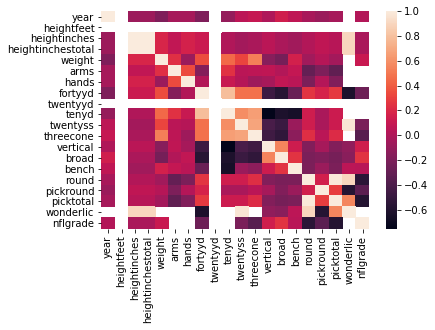

In [13]:
#Heatmap for OT data
sns.heatmap(ot_data.corr())
ot_var = {}
for col in ot_data:
    if (ot_data.var().get(col) != None):
        ot_var[col] = (ot_data.var().get(col))

{'year': 24.413974029398197,
 'heightfeet': 0.0,
 'heightinches': 1.5184496737195965,
 'heightinchestotal': 1.5184496737195967,
 'weight': 211.43310263001783,
 'arms': 1.0169090420449118,
 'hands': 0.28321123321123315,
 'fortyyd': 0.03528186549296784,
 'twentyyd': nan,
 'tenyd': 0.004234461538461541,
 'twentyss': 0.03316646041856233,
 'threecone': 0.07463090243090244,
 'vertical': 9.582617688642195,
 'broad': 42.08011076284061,
 'bench': 24.397491531630507,
 'round': 4.528125928125928,
 'pickround': 119.86017226017226,
 'picktotal': 5719.898782298782,
 'wonderlic': 24.916666666666668,
 'nflgrade': 0.2193393234672304}

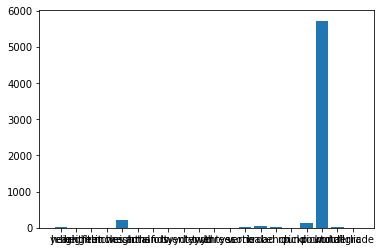

In [14]:
plt.bar(ot_var.keys(), ot_var.values())
ot_var

In [15]:
#raw data with 0s removed
raw_data_nan = raw_data.replace(0, np.NaN)
raw_data_nan

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,NaN,...,6.79,42.5,130.0,24.0,NaN,Nebraska,NaN,NaN,NaN,5.9
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,NaN,72.0,198,NaN,...,NaN,NaN,NaN,12.0,NaN,USC,NaN,NaN,NaN,5.6
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,NaN,72.0,221,NaN,...,7.10,39.0,121.0,19.0,NaN,Boise St.,NaN,NaN,NaN,6.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,NaN,...,7.14,36.0,121.0,24.0,NaN,LSU,NaN,NaN,NaN,5.4
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,NaN,...,6.64,34.0,121.0,13.0,NaN,West Virginia,NaN,NaN,NaN,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,1999,Daren Yancey,Daren,Yancey,DT,6,6.0,78.0,303,NaN,...,NaN,26.5,97.0,NaN,6.0,Brigham Young,19.0,188.0,NaN,NaN
4941,1999,Craig Yeast,Craig,Yeast,WR,5,8.0,68.0,164,NaN,...,NaN,32.5,112.0,NaN,4.0,Kentucky,3.0,98.0,NaN,NaN
4942,1999,Ryan Young,Ryan,Young,OT,6,6.0,78.0,335,NaN,...,NaN,NaN,NaN,20.0,7.0,Kansas State,17.0,223.0,NaN,NaN
4943,1999,Peppi Zellner,Peppi,Zellner,DE,6,5.0,77.0,246,NaN,...,NaN,35.5,122.0,20.0,4.0,Fort Valley State,37.0,132.0,NaN,NaN


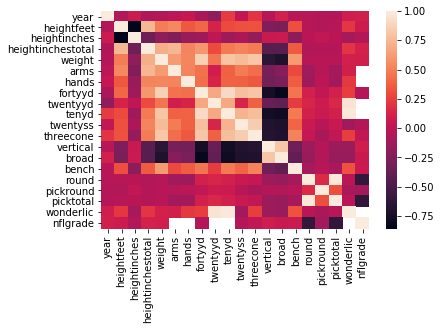

In [16]:
#Heat map for raw data
sns.heatmap(raw_data_nan.corr())

In [17]:
#Numerical raw data correlations
raw_data_nan.corr()

,year,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,pickround,picktotal,wonderlic,nflgrade
year,1.000000,-0.039384,0.065265,-0.056796,-0.024217,0.002910,0.044137,-0.070011,-0.187987,0.245239,0.031230,0.209380,-0.014692,0.108295,-0.012264,-0.018846,-0.027870,-0.025010,0.086406,0.106156
heightfeet,-0.039384,1.000000,-0.856942,0.751026,0.494753,0.542184,0.352868,0.399592,0.125401,0.303488,0.322516,0.328642,-0.261428,-0.270007,0.315362,-0.015791,-0.037990,-0.016753,0.216993,0.078024
heightinches,0.065265,-0.856942,1.000000,-0.335593,-0.190049,-0.249954,-0.151959,-0.125258,0.019814,-0.126730,-0.070219,-0.163391,0.060298,0.071520,-0.206039,-0.007545,0.026059,-0.006202,-0.093254,-0.037378
heightinchestotal,-0.056796,0.751026,-0.335593,1.000000,0.707514,0.739724,0.523560,0.605963,0.296833,0.478815,0.522082,0.491914,-0.423849,-0.435851,0.358727,-0.038191,-0.034380,-0.037144,0.214296,0.116550
weight,-0.024217,0.494753,-0.190049,0.707514,1.000000,0.621651,0.529309,0.866438,0.460988,0.805974,0.768785,0.821489,-0.642031,-0.711586,0.621860,-0.022092,-0.014854,-0.020590,0.111724,0.103135
arms,0.002910,0.542184,-0.249954,0.739724,0.621651,1.000000,0.526357,0.444964,0.092482,0.377547,0.490196,0.429069,-0.297956,-0.222044,0.295255,-0.114923,-0.017387,-0.108980,0.102121,NaN
hands,0.044137,0.352868,-0.151959,0.523560,0.529309,0.526357,1.000000,0.440956,0.133997,0.386666,0.382465,0.353363,-0.306324,-0.281697,0.363881,-0.118459,0.013386,-0.109160,0.229958,NaN
fortyyd,-0.070011,0.399592,-0.125258,0.605963,0.866438,0.444964,0.440956,1.000000,0.676488,0.906712,0.788713,0.816170,-0.748766,-0.821614,0.457142,0.112826,0.023461,0.112400,0.249739,-0.029360
twentyyd,-0.187987,0.125401,0.019814,0.296833,0.460988,0.092482,0.133997,0.676488,1.000000,0.677535,0.143582,0.381987,-0.356357,-0.390631,0.241166,0.137887,0.072826,0.146576,0.962669,NaN
tenyd,0.245239,0.303488,-0.126730,0.478815,0.805974,0.377547,0.386666,0.906712,0.677535,1.000000,0.731199,0.775433,-0.763067,-0.777918,0.478983,0.108902,0.068758,0.114287,0.989602,NaN


In [18]:
# combining positions based on related characterisitcs into groupings (6 classes)
    # 0: Running Backs: RB, FB
    # 1: Pass Catchers: WR, TE
    # 2: Defensive Backs: FS, SS, CB
    # 3: Lineman: OT, OG, OC, C, NT, DT, DE, LS 
    # 4: Linebackers: ILB, OLB
    # 5: Quarterback + Special Team: QB, P, K
    
# create dictionary of metrics corresponding to index in data
pos_dict = {'year': 0, 'name': 1, 'firstname': 2, 'lastname': 3, 'position': 4, 'heightfeet': 5, 
            'heightinches': 6, 'heightinchestotal': 7, 'weight': 8, 'arms': 9, 'hands': 10,
            'fortyyd': 11, 'twentyyd': 12, 'tenyd': 13, 'twentyss': 14, 'threecone': 15, 
            'vertical': 16, 'broad': 17, 'bench': 18, 'round': 19, 'college': 20, 
            'pickround': 21, 'picktotal': 22, 'wonderlic': 23, 'nflgrade': 24}

# extract all players (stored by position) from raw_data
rb = (raw_data.loc[raw_data['position'] == 'RB']).to_numpy()
fb = (raw_data.loc[raw_data['position'] == 'FB']).to_numpy()
wr = (raw_data.loc[raw_data['position'] == 'WR']).to_numpy()
te = (raw_data.loc[raw_data['position'] == 'TE']).to_numpy()
fs = (raw_data.loc[raw_data['position'] == 'FS']).to_numpy()
ss = (raw_data.loc[raw_data['position'] == 'SS']).to_numpy()
cb = (raw_data.loc[raw_data['position'] == 'CB']).to_numpy()
ot = (raw_data.loc[raw_data['position'] == 'OT']).to_numpy()
og = (raw_data.loc[raw_data['position'] == 'OG']).to_numpy()
oc = (raw_data.loc[raw_data['position'] == 'OC']).to_numpy()
c = (raw_data.loc[raw_data['position'] == 'C']).to_numpy()
nt = (raw_data.loc[raw_data['position'] == 'NT']).to_numpy()
dt = (raw_data.loc[raw_data['position'] == 'DT']).to_numpy()
de = (raw_data.loc[raw_data['position'] == 'DE']).to_numpy()
ls = (raw_data.loc[raw_data['position'] == 'LS']).to_numpy()
ilb = (raw_data.loc[raw_data['position'] == 'ILB']).to_numpy()
olb = (raw_data.loc[raw_data['position'] == 'OLB']).to_numpy()
qb = (raw_data.loc[raw_data['position'] == 'QB']).to_numpy()
p = (raw_data.loc[raw_data['position'] == 'P']).to_numpy()
k = (raw_data.loc[raw_data['position'] == 'K']).to_numpy()

# concatenate similar positions based on the classification of groups (detailed above)
run_back = np.concatenate((rb, fb))
pass_catch = np.concatenate((wr, te))
defense_back = np.concatenate((fs, ss, cb))
linemen = np.concatenate((ot, og, oc, c, nt, dt, de, ls))
lineback = np.concatenate((ilb, olb))
quarterback_special = np.concatenate((qb, p, k))

print (run_back)

[[2015 'Ameer Abdullah' 'Ameer' 'Abdullah' 'RB' 5 9.0 69.0 205 0.0 0.0
  4.6 0.0 0.0 3.95 6.79 42.5 130 24 0 'Nebraska' 0 0 0 5.9]
 [2015 'Jay Ajayi' 'Jay' 'Ajayi' 'RB' 6 0.0 72.0 221 0.0 0.0 4.57 0.0 0.0
  4.1 7.1 39.0 121 19 0 'Boise St.' 0 0 0 6.0]
 [2015 'Javorius Allen' 'Javorius' 'Allen' 'RB' 6 0.0 72.0 221 0.0 0.0
  4.53 0.0 0.0 4.28 6.96 35.5 121 11 0 'USC' 0 0 0 5.3]
 [2015 'Cameron Artis-Payne' 'Cameron' 'Artis-Payne' 'RB' 5 10.0 70.0 212
  0.0 0.0 4.53 0.0 0.0 0.0 7.13 36.5 118 0 0 'Auburn' 0 0 0 5.4]
 [2015 'Dominique Brown' 'Dominique' 'Brown' 'RB' 6 2.0 74.0 234 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0 17 0 'Louisville' 0 0 0 5.0]
 [2015 'Malcolm Brown' 'Malcolm' 'Brown' 'RB' 5 11.0 71.0 224 0.0 0.0
  4.62 0.0 0.0 4.15 6.86 34.5 117 19 0 'Texas' 0 0 0 5.2]
 [2015 'B.J. Catalon' 'B.J.' 'Catalon' 'RB' 5 7.0 67.0 186 0.0 0.0 4.57
  0.0 0.0 4.15 6.9 36.0 114 0 0 'TCU' 0 0 0 5.1]
 [2015 'David Cobb' 'David' 'Cobb' 'RB' 5 11.0 71.0 229 0.0 0.0 4.81 0.0
  0.0 0.0 0.0 38.5 121 17 0 'M

In [19]:
# initialize arrays to store data
data_players = []
pos_index = []

#####################################################################################

# *** MODIFY HERE, WHICH PARAMETERS TO EXTRACT AND TRAIN ON ***
parameters = ['weight', 'heightinchestotal', 'broad', 'fortyyd', 'bench']

#####################################################################################

# 0: Running Backs: RB, FB
for i in range(len(run_back)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(run_back[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(0)
    
# 1: Pass Catchers: WR, TE
for i in range(len(pass_catch)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(pass_catch[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(1)
    
# 2: Defensive Backs: FS, SS, CB
for i in range(len(defense_back)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(defense_back[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(2)
    
# 3: Lineman: OT, OG, OC, C, NT, DT, DE, LS 
for i in range(len(linemen)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(linemen[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(3)
    
# 4: Linebackers: ILB, OLB
for i in range(len(lineback)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(lineback[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(4)
    
# 5: Quarterback + Special Team: QB, P, K
for i in range(len(quarterback_special)):
    rowArr = []
    for j in range(len(parameters)):
        rowArr.append(quarterback_special[i][pos_dict.get(parameters[j])])
    data_players.append(np.array(rowArr))
    pos_index.append(5)
    
# convert from list to array
data_players = np.array(data_players)

# one-hot encode outputs for classifcation
pos_index = np.array(pos_index)
pos_cat = to_categorical(pos_index, 6)

# if these output values don't match the commented values, then you probably broke something above
print("Number of Players:", len(data_players)) # --> should be 4945, meaning all players' data pulled
print("Number of Metrics:", len(data_players[0])) # --> should be (number of parameters), meaning all metrics pulled
print("Number of Labels:", len(pos_index)) # --> should be 4945, meaning all players' groupings labeled

# ALL GOOD SO FAR

print(data_players)
#print(pos_cat)
#print(pos_index)

Number of Players: 4945
Number of Metrics: 5
Number of Labels: 4945
[[205.     69.    130.      4.6    24.   ]
 [221.     72.    121.      4.57   19.   ]
 [221.     72.    121.      4.53   11.   ]
 [212.     70.    118.      4.53    0.   ]
 [234.     74.      0.      0.     17.   ]
 [224.     71.    117.      4.62   19.   ]
 [186.     67.    114.      4.57    0.   ]
 [229.     71.    121.      4.81   17.   ]
 [206.     71.      0.      0.     22.   ]
 [217.     72.    125.      4.62   15.   ]
 [217.     69.    116.      4.61   17.   ]
 [218.     68.    120.      4.58   26.   ]
 [220.     69.    117.      4.8    16.   ]
 [215.     73.    126.      4.52   19.   ]
 [222.     73.      0.      0.     17.   ]
 [199.     67.    113.      4.8     0.   ]
 [198.     70.    116.      4.63   19.   ]
 [226.     72.    111.      4.83    0.   ]
 [247.     72.    110.      5.02   30.   ]
 [224.     73.    127.      4.5    25.   ]
 [207.     69.    121.      4.54    0.   ]
 [215.     70.    120.      4

In [20]:
model = Sequential()
model.add(Dense(units=6, input_shape=(len(parameters),), activation='softmax')) # 6 output units, because 6 classes
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(x=data_players, y=pos_cat, validation_split = 0.2, verbose=1, epochs=100, shuffle=True)

Train on 3956 samples, validate on 989 samples
Epoch 1/100
3956/3956 [==============================] - 0s 46us/step - loss: 21.0353 - accuracy: 0.3658 - val_loss: 219.8621 - val_accuracy: 0.0586
Epoch 2/100
3956/3956 [==============================] - 0s 28us/step - loss: 4.2082 - accuracy: 0.5177 - val_loss: 218.0593 - val_accuracy: 0.0536
Epoch 3/100
3956/3956 [==============================] - 0s 25us/step - loss: 1.9614 - accuracy: 0.5779 - val_loss: 217.8928 - val_accuracy: 0.0303
Epoch 4/100
3956/3956 [==============================] - 0s 28us/step - loss: 1.4672 - accuracy: 0.6213 - val_loss: 217.2388 - val_accuracy: 0.0647
Epoch 5/100
3956/3956 [==============================] - 0s 27us/step - loss: 1.2206 - accuracy: 0.6474 - val_loss: 217.6080 - val_accuracy: 0.0536
Epoch 6/100
3956/3956 [==============================] - 0s 27us/step - loss: 1.0708 - accuracy: 0.6603 - val_loss: 217.3856 - val_accuracy: 0.0475
Epoch 7/100
3956/3956 [==============================] - 0s 25us

Epoch 56/100
3956/3956 [==============================] - 0s 25us/step - loss: 0.8255 - accuracy: 0.6577 - val_loss: 218.0947 - val_accuracy: 0.0627
Epoch 57/100
3956/3956 [==============================] - 0s 24us/step - loss: 0.7783 - accuracy: 0.6671 - val_loss: 217.9398 - val_accuracy: 0.0708
Epoch 58/100
3956/3956 [==============================] - 0s 25us/step - loss: 0.7921 - accuracy: 0.6663 - val_loss: 218.2470 - val_accuracy: 0.0617
Epoch 59/100
3956/3956 [==============================] - 0s 23us/step - loss: 0.8053 - accuracy: 0.6587 - val_loss: 217.9587 - val_accuracy: 0.0647
Epoch 60/100
3956/3956 [==============================] - 0s 24us/step - loss: 0.7935 - accuracy: 0.6668 - val_loss: 218.9343 - val_accuracy: 0.0081
Epoch 61/100
3956/3956 [==============================] - 0s 25us/step - loss: 0.8021 - accuracy: 0.6598 - val_loss: 218.0792 - val_accuracy: 0.0536
Epoch 62/100
3956/3956 [==============================] - 0s 26us/step - loss: 0.7990 - accuracy: 0.6613 -

Text(0.5, 1.0, 'accuracy')

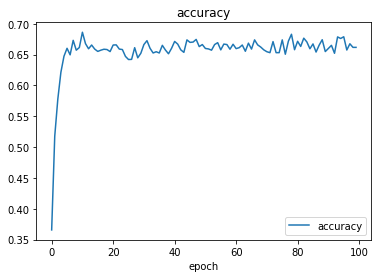

In [21]:
# display accuracy of model
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

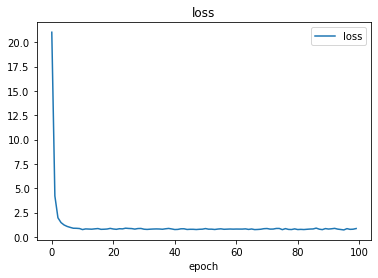

In [22]:
# display loss of model
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [23]:
# individually test for predictions on single point/group of points
point = np.array(data_players)
prediction = model.predict_classes(point)
print("Predicted Classes:", prediction)
print("Actual Classes:", pos_index)

Predicted Classes: [2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 3 1 2 1 1 3 3 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 3 1 1 1 1 1 1 1 3 1
 1 1 1 1 1 0 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 3 1 1 1 2 1 1 3 1 1 3 1
 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 3 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1
 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 3 1 1 2 2 1 1 1 2 1 1 1 3 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 3 1 1 2 1 1 1 1 1
 2 2 3 3 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 3 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1
 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 0 1 1 1 3 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1
 2 3 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 3 1 2 1 2 1 1 1 2 2 2 1 1 1 1 2 1
 2 1 2 1 1 1 2 1 1 3 1 3 3 1 3 1 1 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3
 1 1 3

In [38]:
#Re running and testing accuracy with zeros thrown out

#Testing distribution of initial data
counts = [0, 0, 0, 0, 0, 0]
for cat in pos_index:
    counts[cat]+=1
print ("Categorical Distribution:",counts)

thrown = 0


Categorical Distribution: [557, 922, 885, 1668, 588, 325]


In [39]:
reduced_pos_index = []
for i in pos_index:
    reduced_pos_index.append(i)

for i in range(len(data_players)):
    if (0 in data_players[i]):
        thrown += 1
        reduced_pos_index[i] = 100

reduced_players = [player for player in data_players if not 0 in player]

print("Original list: ", len(data_players))
print("Points thrown out: ", thrown)
print ("Players left: ",len(reduced_players))

reduced_counts = [0, 0, 0, 0, 0, 0]
for cat in reduced_pos_index:
    if (cat != 100):
        reduced_counts[cat]+=1
print("New Categorical Distribution:", reduced_counts)

Original list:  4945
Points thrown out:  1858
Players left:  3087
New Categorical Distribution: [397, 452, 640, 1162, 424, 12]


In [30]:
#removing zeros would harm categorization